## Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

In [1]:
import pandas as pd # импортируем Pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()



In [2]:
# считываем данные
# https://www.kaggle.com/c/titanic/data

df = pd.read_csv('../data/titanic/train.csv')
df1= pd.read_csv('../data/titanic/train.csv')
df2= pd.read_csv('../data/titanic/train.csv')

## Шаблон исследования

### Гипотеза 1

__Формулировка__:

  Выживаемость зависит от класса каюты и пола (В первую очередь в шлюпки сажали женщин затем нескольких мужчин в качестве гребцов, в первую очередь пассажиров 1 класса затем 2 и 3).

In [3]:
# Код для проверки гипотезы

df.Sex.replace({'male':'Мужчины', 'female':'Женщины'}, inplace=True)
fg1=pd.DataFrame(df.groupby(['Pclass', 'Sex'])['Survived'].aggregate(np.mean))

print(fg1)





                Survived
Pclass Sex              
1      Женщины  0.968085
       Мужчины  0.368852
2      Женщины  0.921053
       Мужчины  0.157407
3      Женщины  0.500000
       Мужчины  0.135447


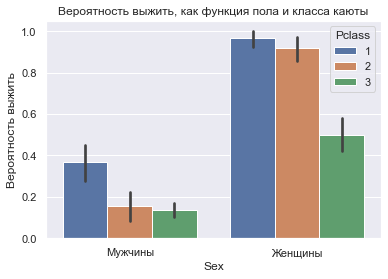

In [4]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.ylabel("Вероятность выжить")
plt.title("Вероятность выжить, как функция пола и класса каюты")
plt.show()

__Вывод__:Гипотеза подтверждена.
Наибольшие шансы выжить имели женщины в первом классе, наименьшие  - мужчины в третьем.

###  Гипотеза 2

__Формулировка__: При соблюдении порядка размещения в шлюпки дети и старики имеют самый высокий шанс выживания

In [5]:
# Код для проверки гипотезы

###

In [6]:
def get_Age_GR(iAge):
    return {
        iAge < 12:  'Ребенок',
        12 <= iAge < 50:  'Взрослый',
        50 <= iAge :  'Старый'
    }[True]


In [7]:
fg1=df.dropna(subset=['Age'])
fg1['Age_Group']=fg1.Age.apply(lambda x: get_Age_GR(x))

<ipython-input-7-3eb8a1fbd2ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg1['Age_Group']=fg1.Age.apply(lambda x: get_Age_GR(x))


In [8]:
fg2=pd.DataFrame(fg1.groupby(['Age_Group'])['Survived'].aggregate(np.mean))

print(fg2)

           Survived
Age_Group          
Взрослый   0.391608
Ребенок    0.573529
Старый     0.364865


In [9]:
'Pclass','Sex'
fg3=fg1.groupby(['Pclass','Sex','Age_Group'])['Survived'].aggregate(np.mean).to_frame()

print(fg3)


                          Survived
Pclass Sex     Age_Group          
1      Женщины Взрослый   0.985507
               Ребенок    0.000000
               Старый     0.933333
       Мужчины Взрослый   0.449275
               Ребенок    1.000000
               Старый     0.206897
2      Женщины Взрослый   0.916667
               Ребенок    1.000000
               Старый     0.833333
       Мужчины Взрослый   0.064935
               Ребенок    1.000000
               Старый     0.076923
3      Женщины Взрослый   0.448718
               Ребенок    0.478261
               Старый     1.000000
       Мужчины Взрослый   0.136986
               Ребенок    0.333333
               Старый     0.000000


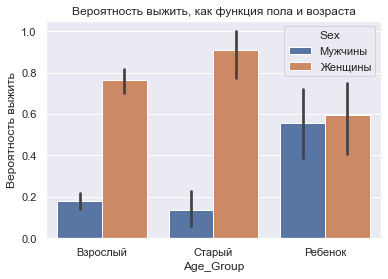

In [10]:
sns.barplot(x='Age_Group', y='Survived', hue='Sex', data=fg1)
plt.ylabel("Вероятность выжить")
plt.title("Вероятность выжить, как функция пола и возраста")
plt.show()

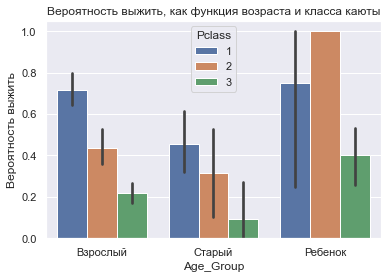

In [11]:
sns.barplot(x='Age_Group', y='Survived', hue='Pclass', data=fg1)
plt.ylabel("Вероятность выжить")
plt.title("Вероятность выжить, как функция возраста и класса каюты")
plt.show()

C:\Users\shadr\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


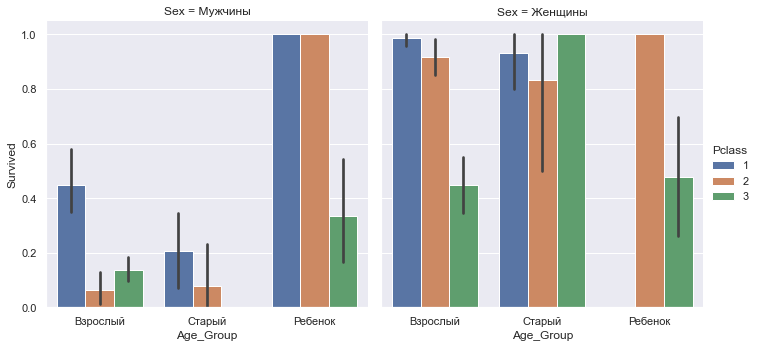

In [12]:
g = sns.factorplot(x="Age_Group", y="Survived", hue="Pclass", col="Sex", data=fg1, kind="bar")

__Вывод__: Гипотеза верна для первого и второго классов. 

### Гипотеза 3
 
__Формулировка__:Вероятность выжить пропорциональна стоимости билета

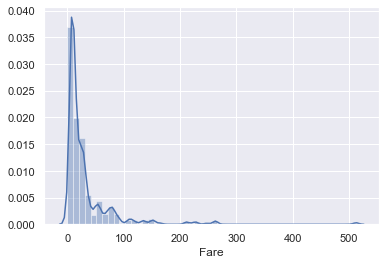

In [13]:
# Код для проверки гипотезы
sns_plot = sns.distplot(df['Fare'])
fig = sns_plot.get_figure()

###

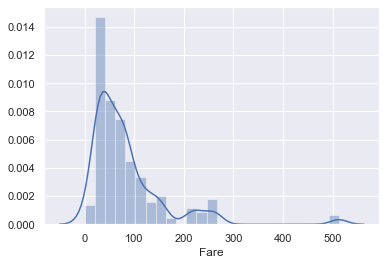

In [14]:
sns_plot = sns.distplot(df[df['Pclass']==1]['Fare'])
fig = sns_plot.get_figure()


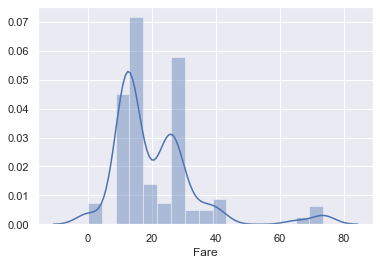

In [15]:
sns_plot = sns.distplot(df[df['Pclass']==2]['Fare'])
fig = sns_plot.get_figure()

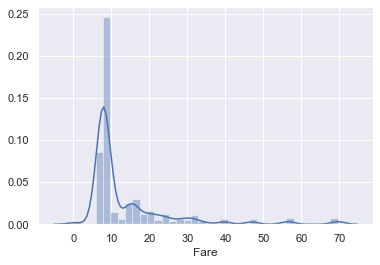

In [16]:
sns_plot = sns.distplot(df[df['Pclass']==3]['Fare'])
fig = sns_plot.get_figure()

In [17]:
# Исследуем особенности набора данных. Предположения об искажающих факторах:
# 1) бесплатные пассажиры
# 2) стоимость билета зависит от места посадки; 
# 3) для семьи выписывался один билет на всех



# 1)Пассажиры с бесплатными билетами
df[df['Fare']==0].groupby(['Pclass','Sex','Embarked']).count()

#Все сели в 'S', все мужчины, присутствуют во всех трех классах.
# После учета остальных особенностей заменим на медианные значения для своих классов
# Смотрим  вначале п.3

,,,Unnamed: 0,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
Pclass,Sex,Embarked,,,,,,,,,,
1,Мужчины,S,5,5,5,5,3,5,5,5,5,3
2,Мужчины,S,6,6,6,6,0,6,6,6,6,0
3,Мужчины,S,4,4,4,4,4,4,4,4,4,0


In [18]:
# исследуем набор без бесплатных пассажиров
df[df['Fare']!=0].groupby(['Pclass','Embarked'])['Fare'].aggregate([min, np.mean,np.median, max, np.std])
#неожиданно! Судно отправлялось из S с заходом в С, далее Q  и через океан. 
#Ожидалось что средняя и медианная цена будет максимальной в S и минимальной в Q/

min        mean   median       max        std
Pclass Embarked                                                   
1      C         26.5500  104.718529  78.2667  512.3292  99.093935
       Q         90.0000   90.000000  90.0000   90.0000   0.000000
       S          5.0000   73.248668  52.5542  263.0000  58.212627
2      C         12.0000   25.358335  24.0000   41.5792  11.345067
       Q         12.3500   12.350000  12.3500   12.3500   0.000000
       S         10.5000   21.099367  14.5000   73.5000  13.285582
3      C          4.0125   11.214083   7.8958   22.3583   4.871528
       Q          6.7500   11.183393   7.7500   29.1250   6.721677
       S          6.2375   14.811923   8.0500   69.5500  13.259006

In [19]:
df[df['Cabin']=='B51 B53 B55']

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",Мужчины,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
872,872,873,0,1,"Carlsson, Mr. Frans Olof",Мужчины,33.0,0,0,695,5.0000,B51 B53 B55,S


In [20]:
df[df['Ticket']=='PC 17755']

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,258,259,1,1,"Ward, Miss. Anna",Женщины,35.0,0,0,PC 17755,512.3292,NaN,C
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",Мужчины,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,737,738,1,1,"Lesurer, Mr. Gustave J",Мужчины,35.0,0,0,PC 17755,512.3292,B101,C


In [21]:
#Считаем количество пассажиров на одном билете
TC=pd.DataFrame(df2.groupby(['Ticket']).PassengerId.count())
TC.rename(columns={'PassengerId':'CountT'})


,CountT
Ticket,
110152,3
110413,3
110465,2
110564,1
110813,1
...,...
W./C. 6608,4
W./C. 6609,1
W.E.P. 5734,1


In [22]:

fg4=pd.merge(df2,TC,left_on='Ticket', right_index=True,how='inner')
fg4.head()

# Почему столбец добавился с именем 'PassengerId_y' а не 'CountT'???? надо было добавить , inplace=False


,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
137,137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S,2


In [23]:
#Пересчитываем стоимость проезда
fg4['Fare']=fg4['Fare']/fg4['PassengerId_y']


In [24]:
fg4[fg4['Fare']!=0].groupby(['Pclass','Embarked'])['Fare'].aggregate([min, np.mean,np.median, max, np.std])

min       mean     median       max        std
Pclass Embarked                                                    
1      C         15.5000  54.016585  41.085400  211.5000  37.093842
       Q         45.0000  45.000000  45.000000   45.0000   0.000000
       S          5.0000  38.254634  30.000000  221.7792  22.241384
2      C         12.0000  15.109312  13.859733   27.7208   3.755211
       Q         12.3500  12.350000  12.350000   12.3500   0.000000
       S          5.2500  13.654747  13.000000   32.5000   5.337729
3      C          4.0125   7.968377   7.229200   21.6792   2.687219
       Q          5.8250   7.925754   7.750000   15.5000   1.551887
       S          3.7111   8.233778   7.895800   22.5250   2.334056

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A64F7FD60>]],
      dtype=object)

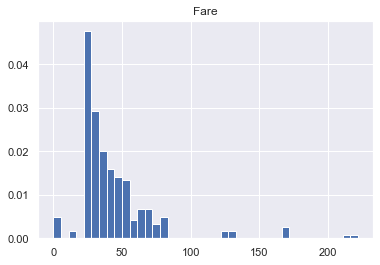

In [25]:
fg4[fg4['Pclass']==1].hist(column='Fare', bins=40, density=True)

In [26]:
# Смотрим хвосты слева
fg4[(fg4['Fare']<25.0) & (fg4['Fare']!=0) & (fg4['Pclass']==1)]


,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
270,270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,15.5,NaN,S,2
842,842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,15.5,NaN,C,2
872,872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S,1


In [27]:
# По видимому 873 пассажир не имеет отношения к первому классу - все остальные пассажиры 
# в этих трех номерах заплатили более 180. Скорее всего это слуга


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A64D31CA0>]],
      dtype=object)

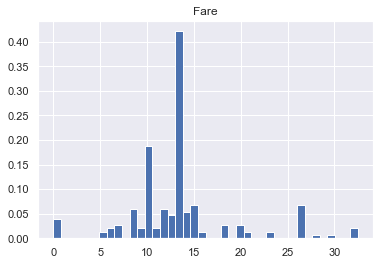

In [28]:
fg4[fg4['Pclass']==2].hist(column='Fare', bins=40, density=True)

In [29]:
# Смотрим хвосты слева

fg4[(fg4['Fare']<10.0) & (fg4['Fare']!=0)& (fg4['Pclass']==2)]


,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
58,58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,9.250000,NaN,S,3
450,450,451,0,2,"West, Mr. Edwy Arthur",male,36.00,1,2,C.A. 34651,9.250000,NaN,S,3
472,472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.00,1,2,C.A. 34651,9.250000,NaN,S,3
148,148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,8.666667,F2,S,3
193,193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,8.666667,F2,S,3
340,340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,8.666667,F2,S,3
237,237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,C.A. 31921,8.750000,NaN,S,3
637,637,638,0,2,"Collyer, Mr. Harvey",male,31.00,1,1,C.A. 31921,8.750000,NaN,S,3
801,801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,8.750000,NaN,S,3
247,247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,7.250000,NaN,S,2


In [30]:
# По списку видно что 1 из путешествующих по билету может ехать бесплатно - младенец, сопровождающее лицо
#  Корректируем на 1
#Пересчитываем стоимость проезда
mask=(fg4['Fare']<10.0) & (fg4['Fare']!=0) & (fg4['Pclass']==2)

fg4.loc[mask,'Fare']=fg4['Fare']*fg4['PassengerId_y']/(fg4['PassengerId_y']-1)


In [31]:
# Смотрим хвосты слева

fg4.loc[mask]

,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
58,58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,13.875,NaN,S,3
450,450,451,0,2,"West, Mr. Edwy Arthur",male,36.00,1,2,C.A. 34651,13.875,NaN,S,3
472,472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.00,1,2,C.A. 34651,13.875,NaN,S,3
148,148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,13.000,F2,S,3
193,193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,13.000,F2,S,3
340,340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,13.000,F2,S,3
237,237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,C.A. 31921,13.125,NaN,S,3
637,637,638,0,2,"Collyer, Mr. Harvey",male,31.00,1,1,C.A. 31921,13.125,NaN,S,3
801,801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.00,1,1,C.A. 31921,13.125,NaN,S,3
247,247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.500,NaN,S,2


In [32]:
#смотрим хвосты справа для 2 класса
mask=(fg4['Fare']>16.0) & (fg4['Pclass']==2) & (fg4['PassengerId_y']>1)
fg4.loc[mask]


,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
145,145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,18.3750,NaN,S,2
549,549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,18.3750,NaN,S,2
183,183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,19.5000,F4,S,2
618,618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,19.5000,F4,S,2
272,272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S,2
446,446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,2
615,615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,32.5000,NaN,S,2
754,754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,32.5000,NaN,S,2
670,670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,19.5000,NaN,S,2
684,684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,19.5000,NaN,S,2


In [33]:
mask1=(fg4['Ticket']=='220845')
fg4.loc[mask1]

,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
615,615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,32.5,NaN,S,2
754,754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,32.5,NaN,S,2


In [34]:
fg4[(fg4['Fare']==0)]

,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y
179,179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,4
271,271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,4
302,302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,4
597,597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,4
263,263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1
277,277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,3
413,413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,3
466,466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,3
481,481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1
633,633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1


In [35]:
# Вновь исследуем набор без бесплатных пассажиров
fg4[fg4['Fare']!=0].groupby(['Pclass','Embarked'])['Fare'].aggregate([min, np.mean,np.median, max, np.std])

min       mean     median       max        std
Pclass Embarked                                                    
1      C         15.5000  54.016585  41.085400  211.5000  37.093842
       Q         45.0000  45.000000  45.000000   45.0000   0.000000
       S          5.0000  38.254634  30.000000  221.7792  22.241384
2      C         12.0000  15.109312  13.859733   27.7208   3.755211
       Q         12.3500  12.350000  12.350000   12.3500   0.000000
       S          9.3750  14.414241  13.000000   32.5000   4.875990
3      C          4.0125   7.968377   7.229200   21.6792   2.687219
       Q          5.8250   7.925754   7.750000   15.5000   1.551887
       S          3.7111   8.233778   7.895800   22.5250   2.334056

In [37]:
# считаем медианы для пассажиров с нулевой стоимостью
mask=(fg4['Fare']!=0) & (fg4['Embarked']=='S') & (fg4['Sex']=='male')
MEd_Fare =fg4[mask].groupby('Pclass')['Fare'].aggregate(np.median).to_frame()
print(MEd_Fare)

           Fare
Pclass         
1       30.0000
2       13.0000
3        7.8958


In [38]:
for i in range(1,4):
    mask=(fg4['Fare']==0) & (fg4['Pclass']==i)
    fg4.loc[mask,'Fare']=MEd_Fare.loc[i].Fare


In [39]:
mask=(df['Fare']==0)
print(fg4.loc[mask])

     Unnamed: 0  PassengerId_x  Survived  Pclass  \
179         179            180         0       3   
271         271            272         1       3   
302         302            303         0       3   
597         597            598         0       3   
263         263            264         0       1   
277         277            278         0       2   
413         413            414         0       2   
466         466            467         0       2   
481         481            482         0       2   
633         633            634         0       1   
674         674            675         0       2   
732         732            733         0       2   
806         806            807         0       1   
815         815            816         0       1   
822         822            823         0       1   

                                 Name   Sex   Age  SibSp  Parch  Ticket  \
179               Leonard, Mr. Lionel  male  36.0      0      0    LINE   
271      Tornquis

In [61]:
cut_labels = ['4-5', '5-6', '6-7', '7-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-25', '25-30', '30-35', '35-45', '45-55', '55-1000']
cut_bins = [4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 45, 55, 1000]

fg4['cut_ex1'] = pd.cut(fg4['Fare'], bins=cut_bins, labels=cut_labels)
fg4.head()


,Unnamed: 0,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId_y,cut_ex1
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7-8
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,55-1000
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7-8
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,26.5500,C123,S,2,25-30
137,137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,26.5500,C123,S,2,25-30


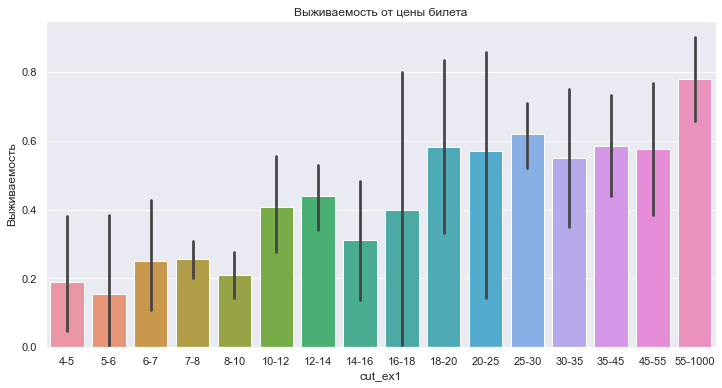

In [63]:
plt.subplots(figsize=(12,6))
sns.barplot(x='cut_ex1' , y='Survived' , data = fg4)
plt.ylabel("Выживаемость")
plt.title("Выживаемость от цены билета")
plt.show()

__Вывод__:

In [ ]:
# Чем выше цена билета, тем выше шансы выжить.

### Вывод исследования:

  

#  
1.Чем выше класс каюты тем выше шансы выжить. 
2.Чем выше стоимость билета тем выше шансы выжить
3.В 1 и 2 классах самые высокие шансы выжить имели дети вне зависимости от пола, женщины  вне зависимости от возраста. Наименьшие - старики. В 3 классе - самые высокие шансы выжить имели женщины, затем дети, наименьшие - взрослые мужчины. 